In [1]:
import pandas as pd
#from pandas_datareader import data
import pandas_datareader.data as web

#for math
import numpy as np
import math

#for date processing
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#for inline charts 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# symbol = 'WIKI/MSFT'  # or 'AAPL.US'
# api = 'rvgspNEFTMAAmLUeYxUY'
# df = web.DataReader(symbol, 'quandl', '2015-01-01', '2020-01-01', api_key=api)
# df[:3]

In [3]:
#Get 10 year stock data
mystocks = ['AAPL', 'DIS', 'MSFT', 'BA', 'ADBE']
Thilak = ['AAL', 'ALK', 'UAL', 'CUK', 'ACB', 'MRO', 'GE', 'ZNGA']
portfolio = web.DataReader(mystocks, 
                       start='2010-01-01', 
                       end='2020-01-01', 
                       data_source='yahoo')['Adj Close']

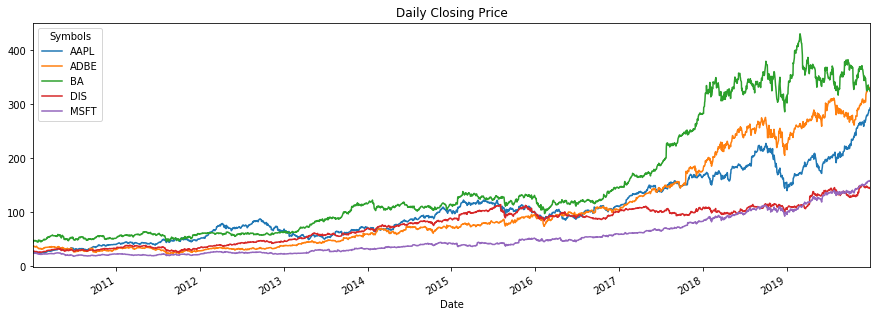

In [4]:
portfolio.plot(figsize=(15,5), title='Daily Closing Price')

In [5]:
daily_return = portfolio.pct_change()

In [6]:
cum_return = (1 + daily_return).cumprod()

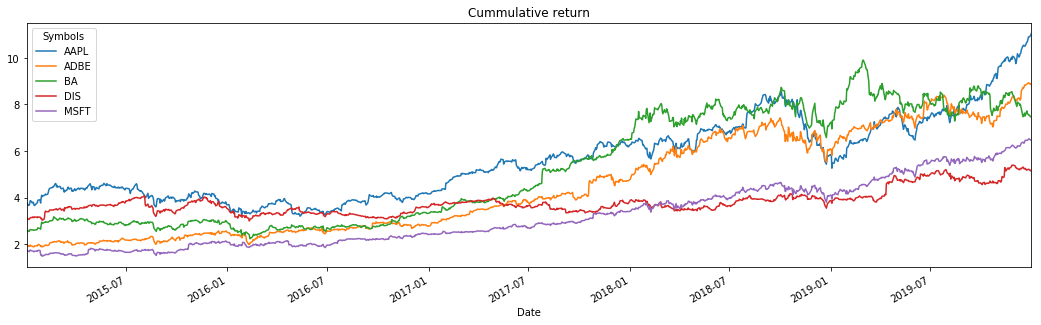

In [7]:
cum_return['2015-01-01':'2020-01-01'].plot(figsize=(18,5), title='Cummulative return')

In [8]:
risk_free_rate = 0.553/100

In [9]:
#10 year average return by calculating return on day 1 of every month
annual_return_monthly = portfolio.resample('M').ffill().pct_change(periods=12)

In [10]:
re = annual_return_monthly.mean() - risk_free_rate
re * 100

Symbols
AAPL    26.423008
ADBE    29.748479
BA      27.144564
DIS     18.834893
MSFT    23.038490
dtype: float64

In [11]:
reT = re.T

In [12]:
ones = pd.Series([1 for num in range(re.count())])

In [13]:
onesT = ones.T

In [14]:
sigma = annual_return_monthly.cov()

In [15]:
inv = pd.DataFrame(np.linalg.pinv(sigma.values), sigma.columns, sigma.index)

In [16]:
tangencynum = np.dot(inv, re)

In [17]:
tangencyden1 = np.dot(onesT, inv)

In [18]:
tangencyden2 = np.dot(tangencyden1, re)

In [19]:
tangency_portfolio_weights = pd.DataFrame(tangencynum, sigma.index, ['weights'])/tangencyden2
tangency_portfolio_weights*100

,weights
Symbols,
AAPL,14.005805
ADBE,24.009860
BA,-6.903803
DIS,30.681541
MSFT,38.206596


In [20]:
tangency_portfolio_return = np.dot(tangencynum/tangencyden2, annual_return_monthly.mean().T)
tangency_portfolio_return * 100

24.10337418658464

In [21]:
tangency_portfolio_std = math.sqrt(np.dot(np.dot(tangencynum/tangencyden2, sigma),tangency_portfolio_weights))
tangency_portfolio_std * 100

12.444458978961832